In [1]:
from googleapiclient.discovery import build
from dateutil import parser
import pandas as pd

# Data viz packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

from textblob import TextBlob

# env
import os
from dotenv import load_dotenv

load_dotenv()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
api_key = os.getenv("api_key")

In [3]:
channel_ids = ['UCYb6YWTBfD0EB53shkN_6vA',
               # more channels here
              ]

In [4]:
api_service_name = "youtube"
api_version = "v3"

# Get credentials and create an API client
youtube = build(
    api_service_name,
    api_version,
    developerKey=api_key
)


In [5]:
def get_channel_stats(youtube, channel_ids):
    
    """
    Get channel stats
    
    Params:
    ------
    youtube: build object of Youtube API
    channel_ids: list of channel IDs
    
    Returns:
    ------
    dataframe with all channel stats for each channel ID
    
    """
    
    all_data = []
    
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=','.join(channel_ids)
    )
    response = request.execute()

    # loop through items
    for item in response['items']:
        data = {'channelName': item['snippet']['title'],
                'subscribers': item['statistics']['subscriberCount'],
                'views': item['statistics']['viewCount'],
                'totalVideos': item['statistics']['videoCount'],
                'playlistId': item['contentDetails']['relatedPlaylists']['uploads']
        }
        
        all_data.append(data)
        
    return(pd.DataFrame(all_data))

def get_video_ids(youtube, playlist_id):
    
    video_ids = []
    
    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId=playlist_id,
        maxResults = 50
    )
    response = request.execute()
    
    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    while next_page_token is not None:
        request = youtube.playlistItems().list(
                    part='contentDetails',
                    playlistId = playlist_id,
                    maxResults = 50,
                    pageToken = next_page_token)
        response = request.execute()

        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])

        next_page_token = response.get('nextPageToken')
        
    return video_ids
    
    
def get_video_details(youtube, video_ids):

    all_video_info = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute() 

        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                             'statistics': ['viewCount', 'likeCount', 'favouriteCount', 'commentCount'],
                             'contentDetails': ['duration', 'definition', 'caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)
    
    return pd.DataFrame(all_video_info)

In [6]:
channel_stats = get_channel_stats(youtube, channel_ids)

In [7]:
channel_stats

,channelName,subscribers,views,totalVideos,playlistId
0,Zyte,3460,508165,47,UUYb6YWTBfD0EB53shkN_6vA


In [8]:
type(channel_stats)

pandas.core.frame.DataFrame

In [9]:
playlist_id = channel_stats["playlistId"][0]

In [10]:
print(playlist_id)

UUYb6YWTBfD0EB53shkN_6vA


In [11]:
# Get video IDs
video_ids = get_video_ids(youtube, playlist_id)

In [12]:
len(video_ids)

47

In [13]:
# Get video details
video_df = get_video_details(youtube, video_ids)
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,2MyGpmSIkEk,Zyte,Zyte Smart Proxy Manager,"Say good bye to geo-blocks, captcha & blocked ...",None,2022-01-31T10:10:42Z,12363,8,None,0,PT31S,hd,false
1,ZcmEYE4_iYk,Zyte,How do we measure data extraction quality,Measuring extraction quality is important both...,None,2021-08-06T10:46:39Z,219,6,None,0,PT1M8S,hd,true
2,GTMHGlfJsFg,Zyte,From code to data: live-coding a small blog sc...,Join Jônatas Paganini’s live-coding session an...,None,2021-08-06T10:20:44Z,173,0,None,0,PT48S,hd,false
3,gRoutX610xI,Zyte,Design-thinking to build effective dashboards ...,Abhijith is a technology director helping busi...,None,2021-07-29T16:26:07Z,93,1,None,0,PT44S,hd,false
4,55g1Boqp7A0,Zyte,Content centric advertisement w/o tracking use...,Kabir has been a part of Adlede for more than ...,None,2021-07-29T16:20:11Z,40,1,None,None,PT1M8S,hd,false
5,922eFihPEGY,Zyte,Ask Me Anything (AMA) with Kevin Lloyd Bernal ...,Kevin is currently a Technical Team Lead at Zy...,None,2021-07-29T16:17:04Z,51,1,None,1,PT55S,hd,false
6,riZndcSrNbw,Zyte,Scraping financial data - a practitioner's exp...,"Linus Nilsson founded NilssonHedge, a public h...",None,2021-07-29T16:14:07Z,66,2,None,0,PT1M1S,hd,false
7,s90G1XF5iFM,Zyte,Scrape and graph your way to conference glory:...,Ljubica Lazarevic is an experienced IT practit...,None,2021-07-29T16:03:11Z,84,0,None,0,PT1M14S,hd,false
8,D_ZlI7VG0Hw,Zyte,Ask Me Anything (AMA) with Nikita Vostretsov a...,Nikita is a member of Data Science team at Zyt...,None,2021-07-29T15:56:37Z,35,0,None,0,PT33S,hd,false
9,koprByWzQ1k,Zyte,Everything you always wanted to know about hea...,Paweł is a Technical Team Lead in Delivery Dep...,None,2021-07-29T15:51:50Z,83,0,None,0,PT43S,hd,false


## Data pre-processing

In [14]:
# Check for NULL values
video_df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount         False
favouriteCount     True
commentCount       True
duration          False
definition        False
caption           False
dtype: bool

In [15]:
# Check data types
video_df.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

In [16]:
# Convert count columns to numeric
numeric_cols = ['viewCount', 'likeCount', 'favouriteCount', 'commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

In [17]:
# Publish day in the week
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x)) 
video_df['pushblishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A")) 

In [18]:
# convert duration to seconds
import isodate
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

In [19]:
# Add tag count
video_df['tagCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [20]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagCount
0,2MyGpmSIkEk,Zyte,Zyte Smart Proxy Manager,"Say good bye to geo-blocks, captcha & blocked ...",None,2022-01-31 10:10:42+00:00,12363.0,8.0,NaN,0.0,PT31S,hd,false,Monday,31.0,0
1,ZcmEYE4_iYk,Zyte,How do we measure data extraction quality,Measuring extraction quality is important both...,None,2021-08-06 10:46:39+00:00,219.0,6.0,NaN,0.0,PT1M8S,hd,true,Friday,68.0,0
2,GTMHGlfJsFg,Zyte,From code to data: live-coding a small blog sc...,Join Jônatas Paganini’s live-coding session an...,None,2021-08-06 10:20:44+00:00,173.0,0.0,NaN,0.0,PT48S,hd,false,Friday,48.0,0
3,gRoutX610xI,Zyte,Design-thinking to build effective dashboards ...,Abhijith is a technology director helping busi...,None,2021-07-29 16:26:07+00:00,93.0,1.0,NaN,0.0,PT44S,hd,false,Thursday,44.0,0
4,55g1Boqp7A0,Zyte,Content centric advertisement w/o tracking use...,Kabir has been a part of Adlede for more than ...,None,2021-07-29 16:20:11+00:00,40.0,1.0,NaN,NaN,PT1M8S,hd,false,Thursday,68.0,0
5,922eFihPEGY,Zyte,Ask Me Anything (AMA) with Kevin Lloyd Bernal ...,Kevin is currently a Technical Team Lead at Zy...,None,2021-07-29 16:17:04+00:00,51.0,1.0,NaN,1.0,PT55S,hd,false,Thursday,55.0,0
6,riZndcSrNbw,Zyte,Scraping financial data - a practitioner's exp...,"Linus Nilsson founded NilssonHedge, a public h...",None,2021-07-29 16:14:07+00:00,66.0,2.0,NaN,0.0,PT1M1S,hd,false,Thursday,61.0,0
7,s90G1XF5iFM,Zyte,Scrape and graph your way to conference glory:...,Ljubica Lazarevic is an experienced IT practit...,None,2021-07-29 16:03:11+00:00,84.0,0.0,NaN,0.0,PT1M14S,hd,false,Thursday,74.0,0
8,D_ZlI7VG0Hw,Zyte,Ask Me Anything (AMA) with Nikita Vostretsov a...,Nikita is a member of Data Science team at Zyt...,None,2021-07-29 15:56:37+00:00,35.0,0.0,NaN,0.0,PT33S,hd,false,Thursday,33.0,0
9,koprByWzQ1k,Zyte,Everything you always wanted to know about hea...,Paweł is a Technical Team Lead in Delivery Dep...,None,2021-07-29 15:51:50+00:00,83.0,0.0,NaN,0.0,PT43S,hd,false,Thursday,43.0,0


In [21]:
video_ids = video_df["video_id"].tolist()
video_titles = video_df["title"].tolist()

In [22]:
# dictionary comprehension
id_title_dict = {v_id: v_title for v_id, v_title in zip(video_ids, video_titles)}

In [23]:
video_ids


['2MyGpmSIkEk',
 'ZcmEYE4_iYk',
 'GTMHGlfJsFg',
 'gRoutX610xI',
 '55g1Boqp7A0',
 '922eFihPEGY',
 'riZndcSrNbw',
 's90G1XF5iFM',
 'D_ZlI7VG0Hw',
 'koprByWzQ1k',
 'SPzgmEZE9f0',
 'V83M6wjZS7k',
 'VLxKca1J-rY',
 'lClrXyX8zmM',
 'oaNH9Wwfoh8',
 'bw2Ql31tTQE',
 '_Vzwq0dd7KY',
 'TLosoD249NA',
 'Z7Q0OVontc8',
 '1Dbs8G1M8l8',
 '7hPuipskzfs',
 'AY6eABsA0OU',
 'i2sE__McrSA',
 'anMuUPI7cBM',
 'cMVSFwhnoFM',
 'FjAS9iWGPrc',
 'f5rw2ZDjA9U',
 'wqUeWPOA8G0',
 '5ablp0lEtIQ',
 'Ugivo426-oI',
 'OY4Ws567Q0s',
 'VvFC93vAB7U',
 'qjCtsHOC4J8',
 'Lo3aswJ7lzw',
 'mw_Vo9m0l8o',
 '7PRy5LnTLaQ',
 'EelmnSzykyI',
 'JW_FxkSohkA',
 'G9Nni6G-iOc',
 'E6lOVwigsNA',
 'qPvPiMbPSTE',
 'vkA1cWN4DEc',
 'oMDYlXuPOag',
 'Wh0NbbL1WhE',
 'JYch0zRmcgU',
 'wCKCmUpDZzQ',
 'ZxHbO_yD6PA']

## EDA

### Best performing videos

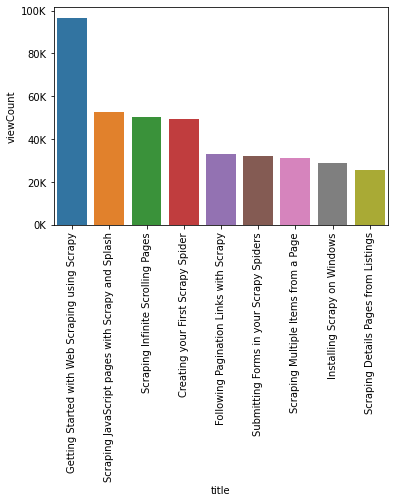

In [24]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

### Worst performing videos

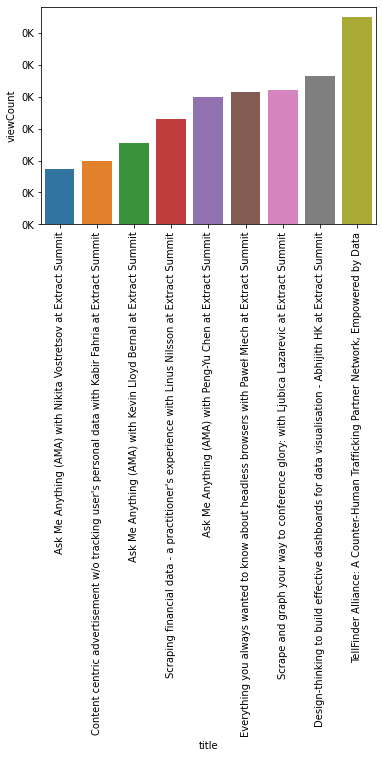

In [25]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

### Wordcloud for video titles

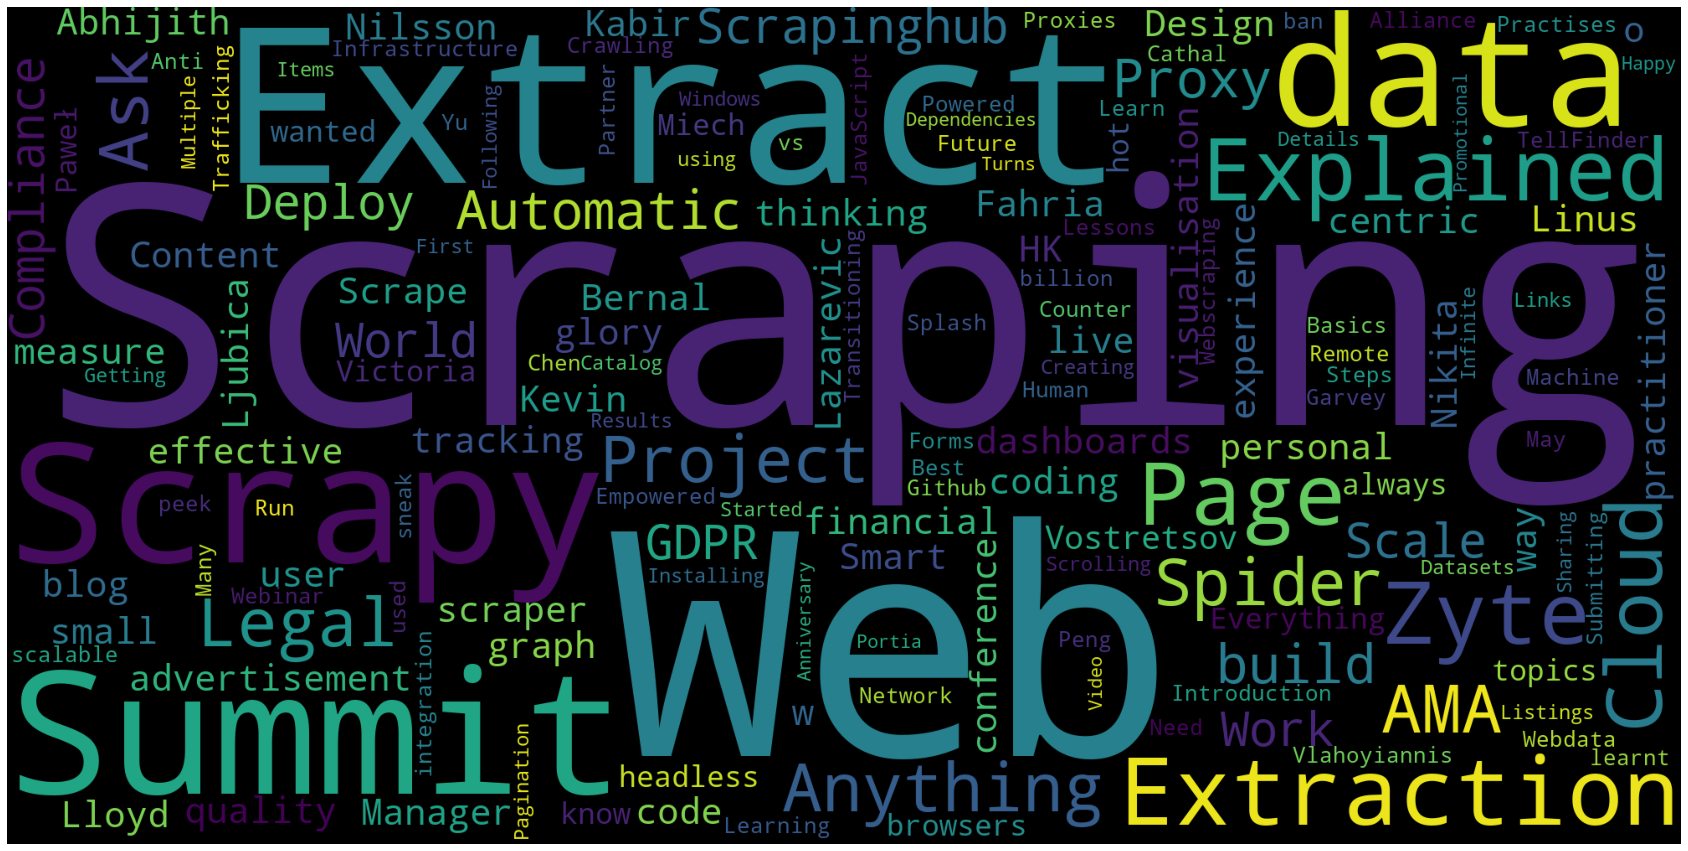

In [26]:
stop_words = set(stopwords.words('english')) # Stopwords are the English words which does not add much meaning to a sentence
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

### Upload schedule

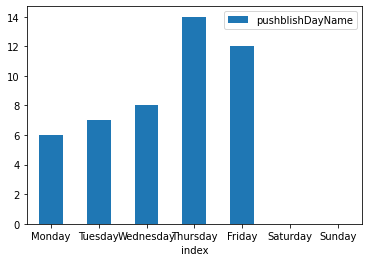

In [27]:
day_df = pd.DataFrame(video_df['pushblishDayName'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x='index', y='pushblishDayName', rot=0)

In [28]:
def get_comments(video_ids):
    id_dict = {}
    
    for video_id in video_ids:
        request = youtube.commentThreads().list(
                part="id,snippet" , # replies,
                order="relevance",
                videoId=video_id,
                maxResults = 50
        )
        try:
            response = request.execute()
            
            for item in response["items"]:
                tmp_dict = {}
                tmp_dict[item["snippet"]["topLevelComment"]["snippet"]["textOriginal"]] = None
                
                if video_id not in id_dict:
                    id_dict[video_id] = []
                    
                id_dict[video_id].append(tmp_dict)
                    
                

            # handle pagination
            next_page_token = response.get('nextPageToken')
            while next_page_token is not None:
                request = youtube.commentThreads().list(
                part="id,snippet" , # replies,
                order="relevance",
                videoId=video_id,
                maxResults = 50,
                pageToken = next_page_token
                )
                
                response = request.execute()
                
                # handle pagination
                for item in response["items"]:
                    tmp_dict = {}
                    tmp_dict[item["snippet"]["topLevelComment"]["snippet"]["textOriginal"]] = None
                
                    if video_id not in id_dict:
                        id_dict[video_id] = []

                    id_dict[video_id].append(tmp_dict)
                    
                    
                next_page_token = response.get('nextPageToken')
            
        except Exception as e: # eg: comments are disabled
            pass
    
    return id_dict

In [29]:
v = get_comments(video_ids)

In [30]:
print(v)

{'922eFihPEGY': [{'Excited!': None}], 'VLxKca1J-rY': [{"Last year's Summit was fantastic, looking forward to this one! :)": None}, {'I am eagerly awaiting this event!': None}, {'Looking forward to this!': None}], 'bw2Ql31tTQE': [{'How is it pronounced?': None}], '_Vzwq0dd7KY': [{'⭐️ Timestamps ⭐️ \xa0\n0:30 Defining a traffic profile \xa0\n0:49 Understanding request volume (number of requests and their frequency)\xa0\n1:39 Geolocation\xa0\n2:12 summary': None}], 'TLosoD249NA': [{'⭐️ Timestamps ⭐️\n0:13 - Short answer on the difference between\xa0Web Scraping and Web Crawling \n0:49 - Web scraping explained\n1:07 - Web Crawling explained\n2:08 - Summary': None}, {'I have a question. With an image or video, what data can we extract from these? Is just file size, movie length, frames, colour wheels?': None}, {'OMG, nice explanation!!!': None}, {'Web Crawler Application\nPart 1: https://www.youtube.com/watch?v=TAH0M8K2PsM\nPart 2: https://www.youtube.com/watch?v=U5h_naZMOZk': None}], '1Dbs

In [31]:

def traverse_dict(v):
    cpy_dict = {}
    for id_, key in v.items():
        for item in key:        
            print(item)
            for sentence in item:
                cpy_dict.update(item)
                blob = TextBlob(sentence)
                item[sentence] = blob.sentiment.polarity
                
    return cpy_dict
    
        
        

In [35]:
cpy_dict = traverse_dict(v)

{'Excited!': 0.46875}
{"Last year's Summit was fantastic, looking forward to this one! :)": 0.3333333333333333}
{'I am eagerly awaiting this event!': 0.0}
{'Looking forward to this!': 0.0}
{'How is it pronounced?': 0.0}
{'⭐️ Timestamps ⭐️ \xa0\n0:30 Defining a traffic profile \xa0\n0:49 Understanding request volume (number of requests and their frequency)\xa0\n1:39 Geolocation\xa0\n2:12 summary': 0.0}
{'⭐️ Timestamps ⭐️\n0:13 - Short answer on the difference between\xa0Web Scraping and Web Crawling \n0:49 - Web scraping explained\n1:07 - Web Crawling explained\n2:08 - Summary': 0.0}
{'I have a question. With an image or video, what data can we extract from these? Is just file size, movie length, frames, colour wheels?': 0.0}
{'OMG, nice explanation!!!': 1.0}
{'Web Crawler Application\nPart 1: https://www.youtube.com/watch?v=TAH0M8K2PsM\nPart 2: https://www.youtube.com/watch?v=U5h_naZMOZk': 0.0}
{'Link for the webinar : https://info.scrapinghub.com/how-to-scale-your-web-scraping-with-pr

In [36]:
def ret_first_n_positive(comment_dict: dict, n : int) -> dict: 
    
    ret_dict = sorted(comment_dict.items(), key=lambda x: x[1], reverse=True)
    
    return ret_dict[:n]

In [37]:
rez = ret_first_n_positive(cpy_dict, 20)

In [38]:
rez

[('OMG, nice explanation!!!', 1.0),
 ('This is awesome! Thank you!!!', 1.0),
 ('this is awesome! but how does it work with shell?', 1.0),
 ('Awesome vid... keep up...', 1.0),
 ('The video is awesome.', 1.0),
 ('These are great videos, thank you for sharing!', 1.0),
 ('the best tutorial i found !!', 1.0),
 ('Awesome videos :D :D', 1.0),
 ('Really awesome video.  But i have a question. When you are scrapping the text data there are some uni-code values in that text. How could we extract this data using uni-code encoding ?',
  1.0),
 ('Awesome', 1.0),
 ('Good one!', 0.875),
 ('Good series. Awesome work.', 0.85),
 ('Great tutorials thank you.', 0.8),
 ('Another great video, thx', 0.8),
 ('Amazing. The best Scrapy tutorial.', 0.8),
 ('You are amazing :D', 0.8),
 ('Great tool...', 0.8),
 ('Man, your worth a billion dollars !!! Amazing Video !! 👍👍👍', 0.76171875),
 ('If I could give more likes, I would :D', 0.75),
 ("good video  but i can't scrape udemy's page without logging", 0.7)]